In [64]:
# import modules for the training,testing and validation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

Read the .csv files from the same directory as the dataset.

In [65]:
train = pd.read_csv("train.csv")
test = pd.read_csv("valid.csv")

In [66]:
# drop columns having more than 70% of non-values from train dataset
train.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [67]:
# drop columns having more than 70% of non-values from test dataset
test.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [68]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A4,1 year,MORTGAGE,44000.0,...,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D2,NaN,MORTGAGE,11420.0,...,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A4,4 years,MORTGAGE,65000.0,...,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B5,NaN,MORTGAGE,46956.0,...,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A4,< 1 year,MORTGAGE,115000.0,...,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,1


In [69]:
# x - axis of the model
X = train.drop(columns=['loan_status'])
X_valid = test.drop(columns=['loan_status'])

# y - axis of the model
y = train['loan_status']
y_valid = test['loan_status']

In [70]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag
0,14000,14000,14000.0,36 months,7.35,434.53,A4,1 year,MORTGAGE,44000.0,...,1.0,100.0,0.0,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N
1,2000,2000,2000.0,36 months,16.29,70.61,D2,NaN,MORTGAGE,11420.0,...,4.0,93.7,100.0,1.0,0.0,9800.0,4168.0,1300.0,0.0,N
2,5000,5000,4750.0,36 months,7.39,155.28,A4,4 years,MORTGAGE,65000.0,...,2.0,100.0,0.0,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N
3,20600,20600,20600.0,36 months,11.99,684.12,B5,NaN,MORTGAGE,46956.0,...,0.0,91.2,50.0,0.0,0.0,105100.0,12355.0,15300.0,0.0,N
4,10000,10000,10000.0,36 months,7.39,310.56,A4,< 1 year,MORTGAGE,115000.0,...,1.0,97.0,25.0,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N


It is now simpler for me to encode items independently and not worry about number values because it is now easier to separate objects and numerical values.

In [71]:
# separate int type columns and object type columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

I have chosen the unique values to display so that it is simpler to grasp which label to encode with which method in order to gain an understanding of how the object values are.

In [72]:
for column in categorical_cols:
    print(X[column].unique())

[' 36 months' ' 60 months']
['A4' 'D2' 'B5' 'C4' 'C1' 'B2' 'A5' 'E1' 'C5' 'A3' 'D5' 'E3' 'B1' 'C3'
 'B3' 'D3' 'B4' 'D4' 'C2' 'A1' 'F4' 'D1' 'A2' 'F1' 'E2' 'G4' 'E4' 'F2'
 'F3' 'G2' 'G5' 'F5' 'E5' 'G1' 'G3']
['1 year' nan '4 years' '< 1 year' '5 years' '10+ years' '2 years'
 '7 years' '9 years' '3 years' '8 years' '6 years']
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'OTHER' 'NONE']
['Not Verified' 'Verified' 'Source Verified']
['debt_consolidation' 'credit_card' 'home_improvement' 'other' 'car'
 'vacation' 'small_business' 'moving' 'house' 'medical' 'major_purchase'
 'renewable_energy' 'wedding' 'educational']
['740xx' '337xx' '786xx' '780xx' '191xx' '080xx' '800xx' '390xx' '054xx'
 '840xx' '210xx' '301xx' '928xx' '112xx' '300xx' '105xx' '104xx' '906xx'
 '314xx' '016xx' '103xx' '087xx' '917xx' '761xx' '178xx' '618xx' '546xx'
 '331xx' '074xx' '980xx' '782xx' '606xx' '541xx' '750xx' '853xx' '605xx'
 '939xx' '852xx' '027xx' '456xx' '923xx' '775xx' '238xx' '973xx' '934xx'
 '745xx' '219xx' '975xx' '217

Having gone over each of the above distinct values. Using functions rather than standard encoding techniques, I concluded that some of the values needed to be encoded. In order to create functions in these situations, I have taken action.

In [73]:
import math

def term_to_value(term):
    return int(term.split()[0])
    
def grade_to_int(term):
    letter_part = term[0]
    number_part = int(term[1])
    letter_value = ord(letter_part) - ord('A') + 1
    encoded_value = (letter_value - 1)*5 + number_part
    return encoded_value

def convert_to_int(value):
    if isinstance(value, str):
        numeric_part = ''.join(filter(str.isdigit, value))
        return int(numeric_part)
    else:
        return None

def length_to_ordinal(emp_length):
    if isinstance(emp_length, str):
        ordinal_mapping = {'< 1 year': 0,
                           '1 year': 1,
                           '2 years': 2,
                           '3 years': 3,
                           '4 years': 4,
                           '5 years': 5,
                           '6 years': 6,
                           '7 years': 7,
                           '8 years': 8,
                           '9 years': 9,
                           '10+ years': 10}
        return ordinal_mapping.get(emp_length, None)
    else:
        return None
    

In [74]:
# Apply all above changes to X and Y axises
X["term"] = X["term"].apply(term_to_value)
X_valid["term"] = X_valid["term"].apply(term_to_value)

X["sub_grade"] = X["sub_grade"].apply(grade_to_int)
X_valid["sub_grade"] = X_valid["sub_grade"].apply(grade_to_int)

X["zip_code"] = X["zip_code"].apply(convert_to_int)
X_valid["zip_code"] = X_valid["zip_code"].apply(convert_to_int)

X["emp_length"] = X["emp_length"].apply(length_to_ordinal)
X_valid["emp_length"] = X_valid["emp_length"].apply(length_to_ordinal)

In [75]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

To encode some of the specified objects, it is preferable to use the initialized LabelEncoder. We have used the LabelEncoder below to encode a selection of labels.


In [76]:
X['home_ownership'] = encoder.fit_transform(X['home_ownership'])
X_valid['home_ownership'] = encoder.fit_transform(X_valid['home_ownership'])

X['verification_status'] = encoder.fit_transform(X['verification_status'])
X_valid['verification_status'] = encoder.fit_transform(X_valid['verification_status'])

X['initial_list_status'] = encoder.fit_transform(X['initial_list_status'])
X_valid['initial_list_status'] = encoder.fit_transform(X_valid['initial_list_status'])

X['application_type'] = encoder.fit_transform(X['application_type'])
X_valid['application_type'] = encoder.fit_transform(X_valid['application_type'])

X['debt_settlement_flag'] = encoder.fit_transform(X['debt_settlement_flag'])
X_valid['debt_settlement_flag'] = encoder.fit_transform(X_valid['debt_settlement_flag'])


I have utilized a correlation matrix in order to gain a better understanding of the association between each label. This makes it simpler to determine if each label is independent or dependent on a given linear function.


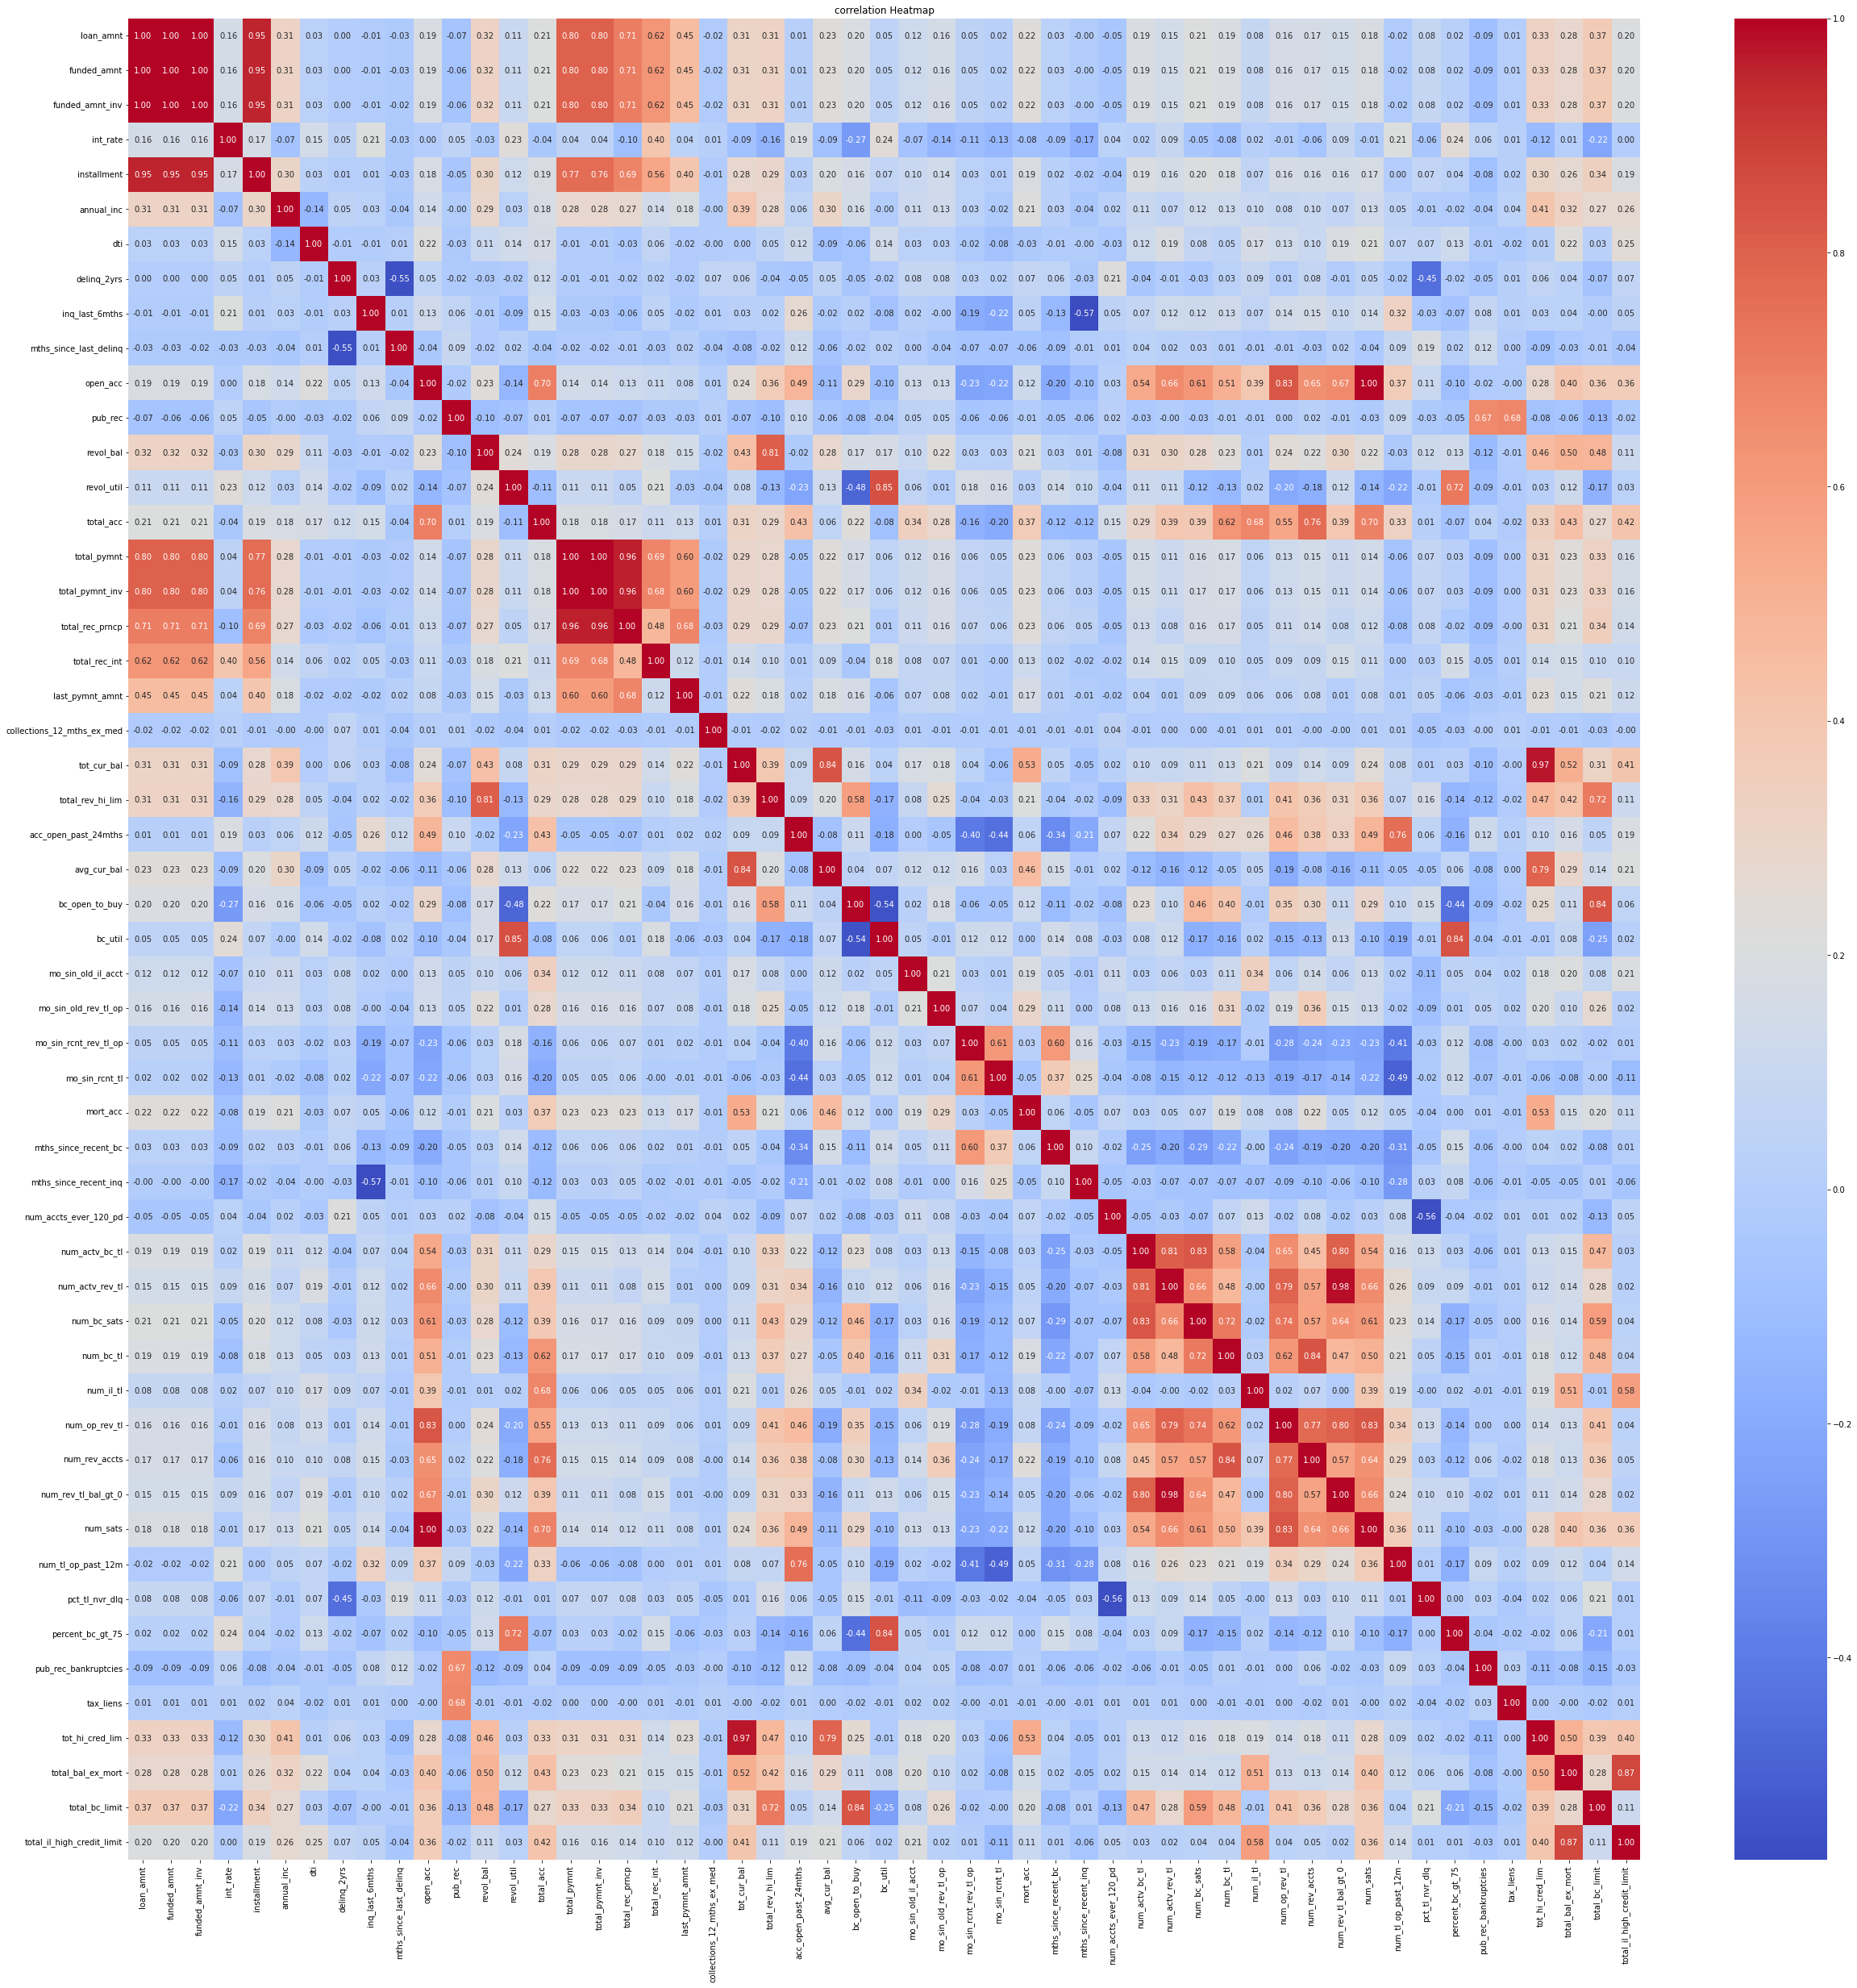

In [77]:
correlation_matrix = X[numeric_cols].corr()
plt.figure(figsize=(42,42))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',fmt=".2f")
plt.title("correlation Heatmap")
# plt.show()
plt.savefig("HeatMap.png")

Our ability to observe that certain traits are virtually linearly dependent is improved when we display the correlation matrix. Thus, to minimize the dataset's dimensions, it is advisable to remove one of the linearly dependent features.


In [78]:
# Need to drop ["tot_hi_cred_lim","percentc_bc_get_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment","funded_amnt_inv","funded_amnt"]
X.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

X_valid.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

For simpler presentation and quicker trend understanding by the model, some of the categorical data have been encoded using one hot encoding.


In [79]:
X = pd.get_dummies(X, columns = ["purpose"],prefix = '', prefix_sep = '')
X_valid = pd.get_dummies(X_valid, columns = ["purpose"],prefix = '', prefix_sep = '')

In [80]:
X["addr_state"].unique()

array(['OK', 'FL', 'TX', 'PA', 'NJ', 'CO', 'MS', 'VT', 'UT', 'MD', 'GA',
       'CA', 'NY', 'MA', 'IL', 'WI', 'WA', 'AZ', 'OH', 'VA', 'OR', 'MO',
       'MI', 'CT', 'SC', 'LA', 'TN', 'IN', 'NC', 'NM', 'AL', 'KS', 'WV',
       'HI', 'MN', 'NE', 'NH', 'DE', 'AR', 'DC', 'WY', 'NV', 'KY', 'RI',
       'AK', 'SD', 'MT', 'ND', 'ID', 'ME', 'IA'], dtype=object)

In [81]:
def encode_date_to_numeric(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], format = '%b-%Y')
    
    df[date_column+'_year'] = df[date_column].dt.year
    df[date_column+'_month'] = df[date_column].dt.month
    
    return df

The older object label has been removed and date values have been encoded using the aforementioned technique.


In [82]:
X = encode_date_to_numeric(X, 'earliest_cr_line')
X_valid = encode_date_to_numeric(X_valid, 'earliest_cr_line')

X = encode_date_to_numeric(X, 'last_pymnt_d')
X_valid = encode_date_to_numeric(X_valid, 'last_pymnt_d')

In [83]:
X.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)
X_valid.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)

It is preferable to convert this into boolean data using a single hot encoding after verifying the "addr_state" label.


In [84]:
X = pd.get_dummies(X, columns = ["addr_state"],prefix = '', prefix_sep = '')
X_valid = pd.get_dummies(X_valid, columns = ["addr_state"],prefix = '', prefix_sep = '')

In [85]:
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [86]:
X[numeric_cols].head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,zip_code,dti,...,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,earliest_cr_line_year,earliest_cr_line_month,last_pymnt_d_year,last_pymnt_d_month
0,14000,36,7.35,4,1.0,1,44000.0,0,740.0,34.70,...,0.0,1.0,23659.0,13600.0,48043.0,0,2003,2,2018.0,12.0
1,2000,36,16.29,17,NaN,1,11420.0,2,337.0,20.61,...,1.0,0.0,4168.0,1300.0,0.0,0,1982,3,2017.0,7.0
2,5000,36,7.39,4,4.0,1,65000.0,0,786.0,11.04,...,0.0,0.0,20061.0,64200.0,21600.0,0,1997,7,2017.0,10.0
3,20600,36,11.99,10,NaN,1,46956.0,1,780.0,24.43,...,0.0,0.0,12355.0,15300.0,0.0,0,1998,4,2018.0,1.0
4,10000,36,7.39,4,0.0,1,115000.0,1,191.0,17.94,...,0.0,1.0,141874.0,12000.0,123535.0,0,2001,1,2017.0,12.0


In [87]:
X.head()

,loan_amnt,term,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,zip_code,dti,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,14000,36,7.35,4,1.0,1,44000.0,0,740.0,34.70,...,False,False,False,False,False,False,False,False,False,False
1,2000,36,16.29,17,NaN,1,11420.0,2,337.0,20.61,...,False,False,False,False,False,False,False,False,False,False
2,5000,36,7.39,4,4.0,1,65000.0,0,786.0,11.04,...,False,False,True,False,False,False,False,False,False,False
3,20600,36,11.99,10,NaN,1,46956.0,1,780.0,24.43,...,False,False,True,False,False,False,False,False,False,False
4,10000,36,7.39,4,0.0,1,115000.0,1,191.0,17.94,...,False,False,False,False,False,False,False,False,False,False


In [88]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [89]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

I have imputed missing values with corresponding mean values in the dataset using SimpleImputer. I thought this was the finest example to do that in.


In [90]:
imputer = SimpleImputer(strategy='mean')

X_imputed = imputer.fit_transform(X)
X_valid_imputed = imputer.fit_transform(X_valid)

I've used MinMaxScaler to turn the encoded and imputed dataset into a non-negative dataset so that all of the labels have positive values so that the model can be trained.


In [91]:
X_shifted = X_imputed - np.min(X_imputed) + 1  # Shift to make all values positive
X_valid_shifted = X_valid_imputed - np.min(X_valid_imputed) + 1

scaler = MinMaxScaler()

X_non_negative = scaler.fit_transform(X_shifted)
X_valid_non_negative = scaler.fit_transform(X_valid_shifted)

Now that every phase of feature engineering, preprocessing, and cleaning has been completed, the model needs to be trained. The K best features from the encoded dataset were chosen using the SelectKBest algorithm prior to that. This helps the model predict things more easily and speeds up and improves the effectiveness of the training process.


In [92]:
k_best = SelectKBest(score_func=chi2, k = 30)


X_selected = k_best.fit_transform(X_non_negative,y)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=0)

In [94]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
y_pred = model.predict(X_test)

In [96]:
X_valid_selected = k_best.transform(X_valid_non_negative)

In [97]:
y_pred_valid = model.predict(X_valid_selected)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9952683520346086


In [99]:
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(accuracy_valid)

0.9945711372221836


The "loan_status" predictions from the trained predictive model are then obtained by applying the same preprocessing and encoding techniques to "X_test.csv" from this point on.


In [100]:
model_test = pd.read_csv('X_test.csv')
X_model_test_encoded = model_test.copy()

In [101]:
X_model_test_encoded.drop(labels = ["id","member_id","grade","emp_title","issue_d","pymnt_plan","url","desc","title","mths_since_last_record",
                      "out_prncp","out_prncp_inv","total_rec_late_fee","recoveries","collection_recovery_fee","next_pymnt_d",
                      "last_credit_pull_d","mths_since_last_major_derog","policy_code","annual_inc_joint","dti_joint",
                      "verification_status_joint","acc_now_delinq","tot_coll_amt","open_acc_6m","open_act_il","open_il_12m",
                      "open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc",
                      "all_util","inq_fi","total_cu_tl","inq_last_12m","chargeoff_within_12_mths","delinq_amnt","mths_since_recent_bc_dlq",
                      "mths_since_recent_revol_delinq","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","revol_bal_joint",
                      "sec_app_earliest_cr_line","sec_app_inq_last_6mths","sec_app_mort_acc","sec_app_open_acc","sec_app_revol_util",
                      "sec_app_open_act_il","sec_app_num_rev_accts","sec_app_chargeoff_within_12_mths","sec_app_collections_12_mths_ex_med",
                      "sec_app_mths_since_last_major_derog","hardship_flag","hardship_type","hardship_reason","hardship_status",
                      "deferral_term","hardship_amount","hardship_start_date","hardship_end_date","payment_plan_start_date","hardship_length",
                      "hardship_dpd","hardship_loan_status","orig_projected_additional_accrued_interest","hardship_payoff_balance_amount",
                      "hardship_last_payment_amount","disbursement_method","debt_settlement_flag_date","settlement_status","settlement_date",
                      "settlement_amount","settlement_percentage","settlement_term"], axis = 1,inplace = True)

In [102]:
X_model_test_encoded["term"] = model_test["term"].apply(term_to_value)
X_model_test_encoded["sub_grade"] = X_model_test_encoded["sub_grade"].apply(grade_to_int)
X_model_test_encoded["zip_code"] = X_model_test_encoded["zip_code"].apply(convert_to_int)
X_model_test_encoded["emp_length"] = X_model_test_encoded["emp_length"].apply(length_to_ordinal)
X_model_test_encoded['home_ownership'] = encoder.fit_transform(X_model_test_encoded['home_ownership'])
X_model_test_encoded['verification_status'] = encoder.fit_transform(X_model_test_encoded['verification_status'])
X_model_test_encoded['initial_list_status'] = encoder.fit_transform(X_model_test_encoded['initial_list_status'])
X_model_test_encoded['application_type'] = encoder.fit_transform(X_model_test_encoded['application_type'])
X_model_test_encoded['debt_settlement_flag'] = encoder.fit_transform(X_model_test_encoded['debt_settlement_flag'])

In [103]:
X_model_test_encoded.drop(labels=["tot_hi_cred_lim","percent_bc_gt_75","num_sats","num_rev_tl_bal_gt_0","total_rec_prncp","total_pymnt_inv","installment",
                   "funded_amnt_inv","funded_amnt"],axis=1,inplace=True)

In [104]:
X_model_test_encoded = pd.get_dummies(X_model_test_encoded, columns = ["purpose"],prefix = '', prefix_sep = '')
X_model_test_encoded = encode_date_to_numeric(X_model_test_encoded, 'earliest_cr_line')
X_model_test_encoded = encode_date_to_numeric(X_model_test_encoded, 'last_pymnt_d')
X_model_test_encoded.drop(labels=['earliest_cr_line','last_pymnt_d'],axis=1,inplace=True)
X_model_test_encoded = pd.get_dummies(X_model_test_encoded, columns = ["addr_state"],prefix = '', prefix_sep = '')

In [105]:
X_test_imputed = imputer.fit_transform(X_model_test_encoded)
X_test_shifted = X_test_imputed - np.min(X_test_imputed) + 1
X_test_non_negative = scaler.fit_transform(X_test_shifted)

In [106]:
X_test_selected = k_best.transform(X_test_non_negative)

In [107]:
y_test_pred = model.predict(X_test_selected)

In [108]:
selected_features = k_best.get_support()
selected_columns = X_model_test_encoded.columns[selected_features]
selected_data = X_model_test_encoded[selected_columns]

In [109]:
selected_data.loc[:,'loan_status'] = y_test_pred
selected_data.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,loan_amnt,term,int_rate,sub_grade,home_ownership,verification_status,inq_last_6mths,total_pymnt,total_rec_int,last_pymnt_amnt,...,car,credit_card,debt_consolidation,home_improvement,small_business,CO,NY,OR,WA,loan_status
0,8100,36,11.47,10,5,1,2.0,8146.460000,46.46,8151.62,...,False,False,True,False,False,False,False,False,False,1
1,10000,36,12.99,12,4,1,2.0,1966.540000,310.08,336.90,...,False,False,False,False,True,False,False,False,False,0
2,9450,36,13.67,10,1,2,1.0,10328.803125,878.80,7757.04,...,False,False,True,False,False,False,False,False,False,1
3,25000,36,17.49,20,1,2,0.0,32307.326877,7307.33,946.48,...,False,False,True,False,False,False,False,False,False,1
4,16000,60,14.99,15,1,2,1.0,12368.960000,4754.46,380.56,...,False,False,True,False,False,False,False,False,False,0


In [110]:
last_column = selected_data.columns[-1]

selected_data_new = pd.concat([selected_data[last_column], selected_data.drop(columns=[last_column])],axis=1)

selected_data_new.head()

,loan_status,loan_amnt,term,int_rate,sub_grade,home_ownership,verification_status,inq_last_6mths,total_pymnt,total_rec_int,...,debt_settlement_flag,car,credit_card,debt_consolidation,home_improvement,small_business,CO,NY,OR,WA
0,1,8100,36,11.47,10,5,1,2.0,8146.460000,46.46,...,0,False,False,True,False,False,False,False,False,False
1,0,10000,36,12.99,12,4,1,2.0,1966.540000,310.08,...,0,False,False,False,False,True,False,False,False,False
2,1,9450,36,13.67,10,1,2,1.0,10328.803125,878.80,...,0,False,False,True,False,False,False,False,False,False
3,1,25000,36,17.49,20,1,2,0.0,32307.326877,7307.33,...,0,False,False,True,False,False,False,False,False,False
4,0,16000,60,14.99,15,1,2,1.0,12368.960000,4754.46,...,0,False,False,True,False,False,False,False,False,False


In [49]:
selected_data_new.to_csv('210163M.csv', index=False)

After getting the optimized model, I evaluated the impact of the features using shap module for selected model

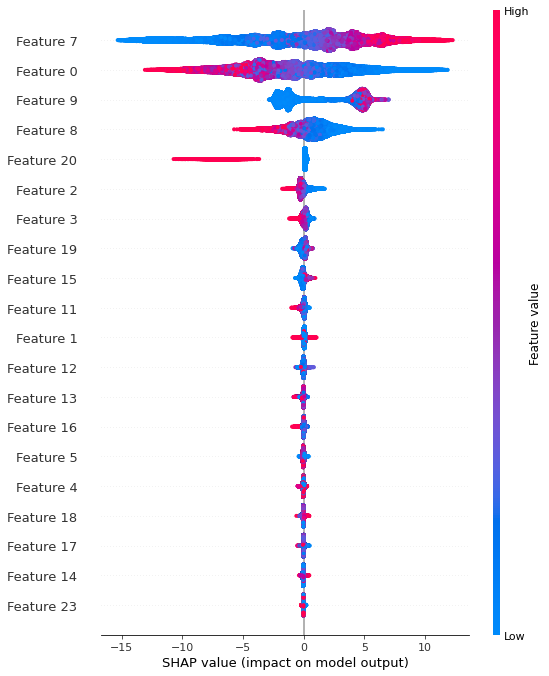

In [111]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test_selected)
shap.summary_plot(shap_values , X_test_selected)